In [2]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="Cred_Service.json"

In [7]:
from google.cloud import bigquery
client = bigquery.Client()
dataset_ref = client.dataset("chicago_taxi_trips", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)
tables = list(client.list_tables(dataset))
tables = list(client.list_tables(dataset))
for table in tables:  
    print(table.table_id)

taxi_trips


In [11]:
rides_per_year = """ 
            SELECT COUNT(1) AS num_trips,
            EXTRACT(YEAR FROM trip_start_timestamp) AS year
            FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
            GROUP BY year
            ORDER BY year
        """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)

rides_per_year_query_job = client.query(rides_per_year, job_config=safe_config)

rides_per_year_result = rides_per_year_query_job.to_dataframe()

print(rides_per_year_result)

   num_trips  year
0   27217716  2013
1   37395436  2014
2   32385875  2015
3   31759339  2016
4   24988003  2017
5   20732088  2018
6   16477365  2019
7    3889032  2020
8     302466  2021


In [14]:
rides_per_month = """ 
            SELECT COUNT(1) AS num_trips,
            EXTRACT(YEAR FROM trip_start_timestamp)|| '-'|| EXTRACT(MONTH FROM trip_start_timestamp) AS year_month
            FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
            WHERE trip_miles < 6
            GROUP BY year_month
            ORDER BY year_month
        """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)

rides_per_month_query_job = client.query(rides_per_month, job_config=safe_config)

rides_per_month_result = rides_per_month_query_job.to_dataframe()

print(rides_per_month_result)

    num_trips year_month
0     1412633     2013-1
1     2358157    2013-10
2     2322008    2013-11
3     2427223    2013-12
4     1628598     2013-2
..        ...        ...
94     106554     2020-8
95     119212     2020-9
96      96291     2021-1
97     102903     2021-2
98          4     2021-3

[99 rows x 2 columns]


<AxesSubplot:xlabel='year_month'>

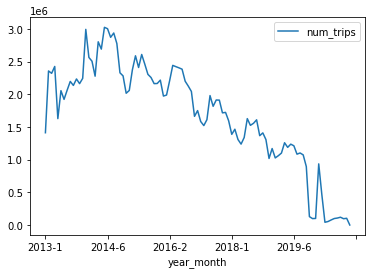

In [17]:
import matplotlib.pyplot as plt
rides_per_month_result.plot(x ='year_month', y='num_trips', kind = 'line')	

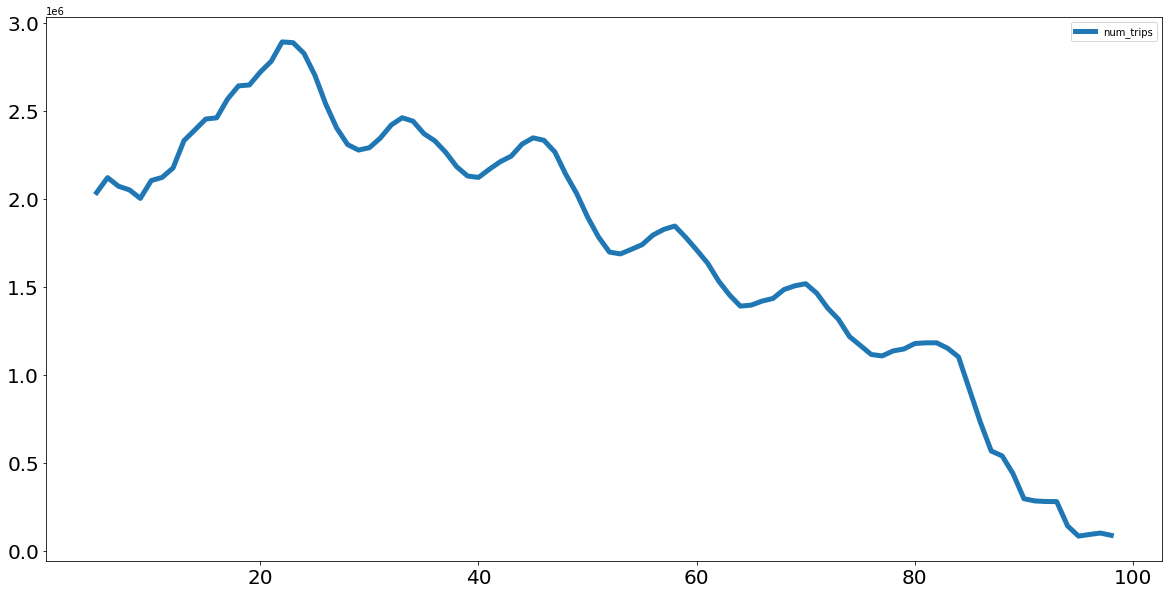

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

rides_per_month_result['num_trips'] = rides_per_month_result['num_trips'].astype(np.int32)
rides_per_month_result['year_month'] = pd.to_datetime(rides_per_month_result['year_month'], format = '%Y-%m')

rides_per_month_result.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

In [33]:
rides_per_month = """ 
            SELECT pickup_latitude,pickup_longitude,count(*)
            FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
            GROUP BY pickup_latitude,pickup_longitude
        """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)

rides_per_month_query_job = client.query(rides_per_month, job_config=safe_config)

rides_per_month_result = rides_per_month_query_job.to_dataframe()

print(rides_per_month_result)

     pickup_latitude  pickup_longitude    f0_
0          41.907413        -87.640902  95530
1          41.717493        -87.648895  22868
2          41.745758        -87.708366  21557
3          41.929330        -87.711974  18774
4          41.985472        -87.653794   9384
..               ...               ...    ...
853        41.826663        -87.679907     47
854        41.817398        -87.692032     11
855        41.842807        -87.635791     16
856        41.689538        -87.540397      8
857        41.735581        -87.549284      3

[858 rows x 3 columns]


In [31]:
rides_per_month_result.to_csv('latcount.csv')